In [116]:
import sys,os
# 修改当前工作目录，为了方便导入项目中的包
dir = '/Users/piginzoo/workspaces/quant_research/cta/'
sys.path.append(dir)
os.chdir(dir)
print("当前工作目录：",os.getcwd())

from utils import utils
utils.init_logger()


当前工作目录： /Users/piginzoo/workspaces/quant_research/cta
开始初始化日志：file=False, simple=False


# ak函数北上资金

In [23]:
# https://akshare.xyz/data/stock/stock.html#id122

import akshare as ak

stock_hsgt_hist_em_df = ak.stock_hsgt_hist_em(symbol="沪股通")
print(stock_hsgt_hist_em_df)

              日期   当日成交净买额     买入成交额     卖出成交额    历史累计净买额    当日资金流入      当日余额  \
0     2023-01-30   94.3504  395.4183  301.0679  9710.3453  105.1182  414.8818   
1     2023-01-20   42.1054  244.8049  202.6995  9615.9949   50.5336  469.4664   
2     2023-01-19   56.9071  232.0952  175.1881  9573.8895   67.1782  452.8218   
3     2023-01-18   19.9025  187.5199  167.6174  9516.9824   29.4050  490.5950   
4     2023-01-17   43.1586  227.2377  184.0791  9497.0799   53.2918  466.7082   
...          ...       ...       ...       ...        ...       ...       ...   
1894  2014-11-21   21.9953   24.3055    2.3102   236.4024   23.4100  106.5900   
1895  2014-11-20   21.4194   23.0973    1.6779   214.4071   22.7600  107.2400   
1896  2014-11-19   24.9677   26.6951    1.7274   192.9877   26.1200  103.8800   
1897  2014-11-18   47.1967   49.4367    2.2400   168.0200   48.4500   81.5500   
1898  2014-11-17  120.8233  120.8233    0.0000   120.8233  130.0000    0.0000   

       领涨股  领涨股涨跌幅     上证指数

In [24]:
df = stock_hsgt_hist_em_df
df

,日期,当日成交净买额,买入成交额,卖出成交额,历史累计净买额,当日资金流入,当日余额,领涨股,领涨股涨跌幅,上证指数,涨跌幅
0,2023-01-30,94.3504,395.4183,301.0679,9710.3453,105.1182,414.8818,李子园,10.02,3269.32,0.140
1,2023-01-20,42.1054,244.8049,202.6995,9615.9949,50.5336,469.4664,中航产融,10.02,3264.81,0.760
2,2023-01-19,56.9071,232.0952,175.1881,9573.8895,67.1782,452.8218,中望软件,11.16,3240.28,0.490
3,2023-01-18,19.9025,187.5199,167.6174,9516.9824,29.4050,490.5950,美凯龙,10.05,3224.41,0.005
4,2023-01-17,43.1586,227.2377,184.0791,9497.0799,53.2918,466.7082,美凯龙,10.10,3224.24,-0.100
...,...,...,...,...,...,...,...,...,...,...,...
1894,2014-11-21,21.9953,24.3055,2.3102,236.4024,23.4100,106.5900,大众公用,10.02,2486.79,1.390
1895,2014-11-20,21.4194,23.0973,1.6779,214.4071,22.7600,107.2400,厦门国贸,9.37,2452.66,0.070
1896,2014-11-19,24.9677,26.6951,1.7274,192.9877,26.1200,103.8800,君正集团,6.85,2450.99,-0.220
1897,2014-11-18,47.1967,49.4367,2.2400,168.0200,48.4500,81.5500,厦门国贸,10.06,2456.37,-0.710


# tushare 北上资金
https://tushare.pro/document/2?doc_id=47

In [1]:
import yaml
import tushare as ts
import pandas as pd
conf = yaml.load(open('../../conf/config.yml', 'r', encoding='utf-8').read(), Loader=yaml.FullLoader)
print(conf['token'][:10])
pro = ts.pro_api(conf['token'])

bf542ab154


In [2]:
import pandas as pd
dfs = []
for year in range(2015,2024):
    start = f'{year}0101'
    end = f'{year}1231'
    print(start,'~',end)
    df = pro.moneyflow_hsgt(start_date=start, end_date=end)
    dfs.append(df)
df = pd.concat(dfs)
print(df)

20150101 ~ 20151231
20160101 ~ 20161231
20170101 ~ 20171231
20180101 ~ 20181231
20190101 ~ 20191231
20200101 ~ 20201231
20210101 ~ 20211231
20220101 ~ 20221231
20230101 ~ 20231231
   trade_date   ggt_ss   ggt_sz      hgt      sgt  north_money  south_money
0    20151231   432.00     None  -454.00     None      -454.00       432.00
1    20151230   766.00     None   664.00     None       664.00       766.00
2    20151229   428.00     None   906.00     None       906.00       428.00
3    20151228   545.00     None    35.00     None        35.00       545.00
4    20151224   212.00     None      NaN     None         0.00       212.00
..        ...      ...      ...      ...      ...          ...          ...
15   20230109  -859.83  -365.28  4723.00   2977.3      7700.30     -1225.11
16   20230106  -987.00  -356.75  4471.66   1594.6      6066.26     -1343.75
17   20230105  1789.44   1508.9  5658.67  7094.66     12753.33      3298.34
18   20230104  2372.26  2637.53   338.41  1505.79      1844.

In [8]:
df[(df.trade_date>'20210101') & (df.trade_date<'20210201')]

,trade_date,ggt_ss,ggt_sz,hgt,sgt,north_money,south_money
214,20210129,6059.12,6402.31,485.43,2047.4,2532.83,12461.43
215,20210128,3385.09,6833.47,-3660.40,-2744.17,-6404.57,10218.56
216,20210127,8485.39,15044.59,-1231.26,-23.47,-1254.73,23529.98
217,20210126,5764.63,8182.72,-2916.14,-625.06,-3541.20,13947.35
218,20210125,7332.62,11922.72,1626.93,304.07,1931.00,19255.34
219,20210122,3391.84,5974.49,-797.49,-1222.29,-2019.78,9366.33
220,20210121,7327.87,8935.58,2826.57,2851.34,5677.91,16263.45
221,20210120,6787.23,13500.6,-1357.36,4751.61,3394.25,20287.83
222,20210119,13121.37,13471.38,1139.06,-220.6,918.46,26592.75
223,20210118,9452.67,13517.97,-665.50,2302.09,1636.59,22970.64


In [33]:
import pandas as pd
dfs = []
for year in range(2015,2016):
    start = f'{year}0101'
    end = f'{year}1231'
    print(start,'~',end)
    df = pro.moneyflow_hsgt(start_date=start, end_date=end)
    dfs.append(df)
df = pd.concat(dfs)
print(df)

20150101 ~ 20151231
    trade_date  ggt_ss ggt_sz     hgt   sgt  north_money  south_money
0     20151231   432.0   None  -454.0  None       -454.0        432.0
1     20151230   766.0   None   664.0  None        664.0        766.0
2     20151229   428.0   None   906.0  None        906.0        428.0
3     20151228   545.0   None    35.0  None         35.0        545.0
4     20151224   212.0   None     NaN  None          0.0        212.0
..         ...     ...    ...     ...   ...          ...          ...
232   20150109   802.0   None  1617.0  None       1617.0        802.0
233   20150108   637.0   None  1078.0  None       1078.0        637.0
234   20150107   909.0   None  1753.0  None       1753.0        909.0
235   20150106   968.0   None  2091.0  None       2091.0        968.0
236   20150105  1730.0   None  4689.0  None       4689.0       1730.0

[237 rows x 7 columns]


# tushare北向资金的10大股
https://tushare.pro/document/2?doc_id=48

In [34]:
import pandas as pd
dfs = []
for year in range(2015,2017):
    start = f'{year}0101'
    end = f'{year}1231'
    print(start,'~',end)
    df = pro.hsgt_top10(start_date=start, end_date=end,market_type='1')
    dfs.append(df)
    df = pro.hsgt_top10(start_date=start, end_date=end,market_type='2')
    dfs.append(df)

df = pd.concat(dfs)
print(df)

20150101 ~ 20151231
20160101 ~ 20161231
    trade_date    ts_code  name   close  change rank market_type       amount  \
0     20151231  601933.SH  永辉超市   10.10 -2.2265    1           1  326354253.0   
1     20151231  601318.SH  中国平安   36.00  0.6711    6           1   50307814.0   
2     20151231  600887.SH  伊利股份   16.43 -0.6651    9           1   31914705.0   
3     20151231  600881.SH  亚泰集团    7.24 -0.4127    4           1   54296935.0   
4     20151231  600519.SH  贵州茅台  218.19 -0.3061    5           1   51744263.0   
..         ...        ...   ...     ...     ...  ...         ...          ...   
295   20161116  600585.SH  海螺水泥   18.05 -1.1501    5           1   76569452.0   
296   20161116  600519.SH  贵州茅台  313.15 -0.2739    2           1  117810165.0   
297   20161116  600487.SH  亨通光电   19.15  1.9159    3           1   88376172.0   
298   20161116  600030.SH  中信证券   17.46  0.0573    6           1   75330725.0   
299   20161116  600016.SH  民生银行    9.19 -0.2172    8           1   46

# 计算rsrs

In [104]:
%%time

import sys,os
# 修改当前工作目录，为了方便导入项目中的包
dir = '/Users/piginzoo/workspaces/quant_research/cta/'
sys.path.append(dir)
os.chdir(dir)
print("当前工作目录：",os.getcwd())

from utils import data_loader
df = data_loader.load_stock('600000.SH')

from triples.my import triples_strategy
from utils import utils
from importlib import reload
reload(triples_strategy)
ts = triples_strategy.TripleStrategy(None,utils.load_params('triples/params.yml'))

# today = utils.str2date('20200106')
# beta,r2 = ts.calculate_rsrs(df)
# print("beta,r2:",beta,r2)

# 提速测试用
# df = df.iloc[:100]

def clac_rsrs(close):
    # print(df.loc[close.index])
    df1 = df.loc[close.index]
    #print("-"*20)
    beta,r2 = ts.calculate_rsrs(df1)
    # 参考这种方法，解决rolling.apply无法返回多个结果的问题
    # https://stackoverflow.com/questions/62716558/pandas-apply-on-rolling-with-multi-column-output
    df.loc[close.index,['beta','r2']] = [beta,r2]
    return 1
def clac_adjust_zscore(close):
    df1 = df.loc[close.index]
    mean = df1.beta.mean()
    std = df1.beta.std()
    beta = df1.iloc[-1].beta
    r2 = df1.iloc[-1].r2
    zscore = (beta - mean)/std
    adjust_zscore =  zscore * r2
    df.loc[close.index,['zscore','adjust_zscore']] = [zscore,adjust_zscore]
    return 1

import numpy as np
df['beta'] = np.nan
df['r2'] = np
# 先计算18天窗口期内的beta和r2
df.close.rolling(window=18).apply(clac_rsrs,raw=False)
print("计算完beta和r2")

# 再计算250天窗口期的移动平均值
df.beta.rolling(window=250).apply(clac_adjust_zscore,raw=False)

df

当前工作目录： /Users/piginzoo/workspaces/quant_research/cta
计算完beta和r2
CPU times: user 13.2 s, sys: 79.5 ms, total: 13.3 s
Wall time: 13.7 s


,Unnamed: 0,open,close,high,low,成交量,volume,振幅,pcg_chg,涨跌额,换手率,code,beta,r2,zscore,adjust_zscore
date,,,,,,,,,,,,,,,,
1999-11-10,0,-0.01,-0.28,0.03,-0.39,1740850,4.859102e+09,-14.14,90.57,2.69,54.40,600000,0.520951,0.632731,0.528566,0.376733
1999-11-11,1,-0.30,-0.28,-0.18,-0.31,294034,8.215820e+08,-46.43,0.00,0.00,9.19,600000,0.833116,0.864896,0.534309,0.395165
1999-11-12,2,-0.26,-0.23,-0.20,-0.27,150079,4.215910e+08,-25.00,17.86,0.05,4.69,600000,0.812291,0.854772,1.183834,0.964910
1999-11-15,3,-0.21,-0.28,-0.20,-0.29,119210,3.329520e+08,-39.13,-21.74,-0.05,3.73,600000,0.713466,0.853614,1.093589,0.950582
1999-11-16,4,-0.26,-0.46,-0.24,-0.47,232231,6.289080e+08,-82.14,-64.29,-0.18,7.26,600000,0.615608,0.869728,0.986991,0.889900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-20,5505,7.34,7.36,7.36,7.32,209870,1.542398e+08,0.55,0.41,0.03,0.07,600000,1.143954,0.856528,0.944226,0.808756
2023-01-30,5506,7.43,7.40,7.43,7.37,318107,2.353520e+08,0.82,0.54,0.04,0.11,600000,1.143954,0.856528,0.944226,0.808756
2023-01-31,5507,7.42,7.37,7.45,7.37,284382,2.107154e+08,1.08,-0.41,-0.03,0.10,600000,1.143954,0.856528,0.944226,0.808756


原有： 5510
去NAN： 5510
count    5510.000000
mean        0.135296
std         0.790118
min        -2.585202
25%        -0.423805
50%         0.109932
75%         0.736439
max         3.668812
Name: adjust_zscore, dtype: float64


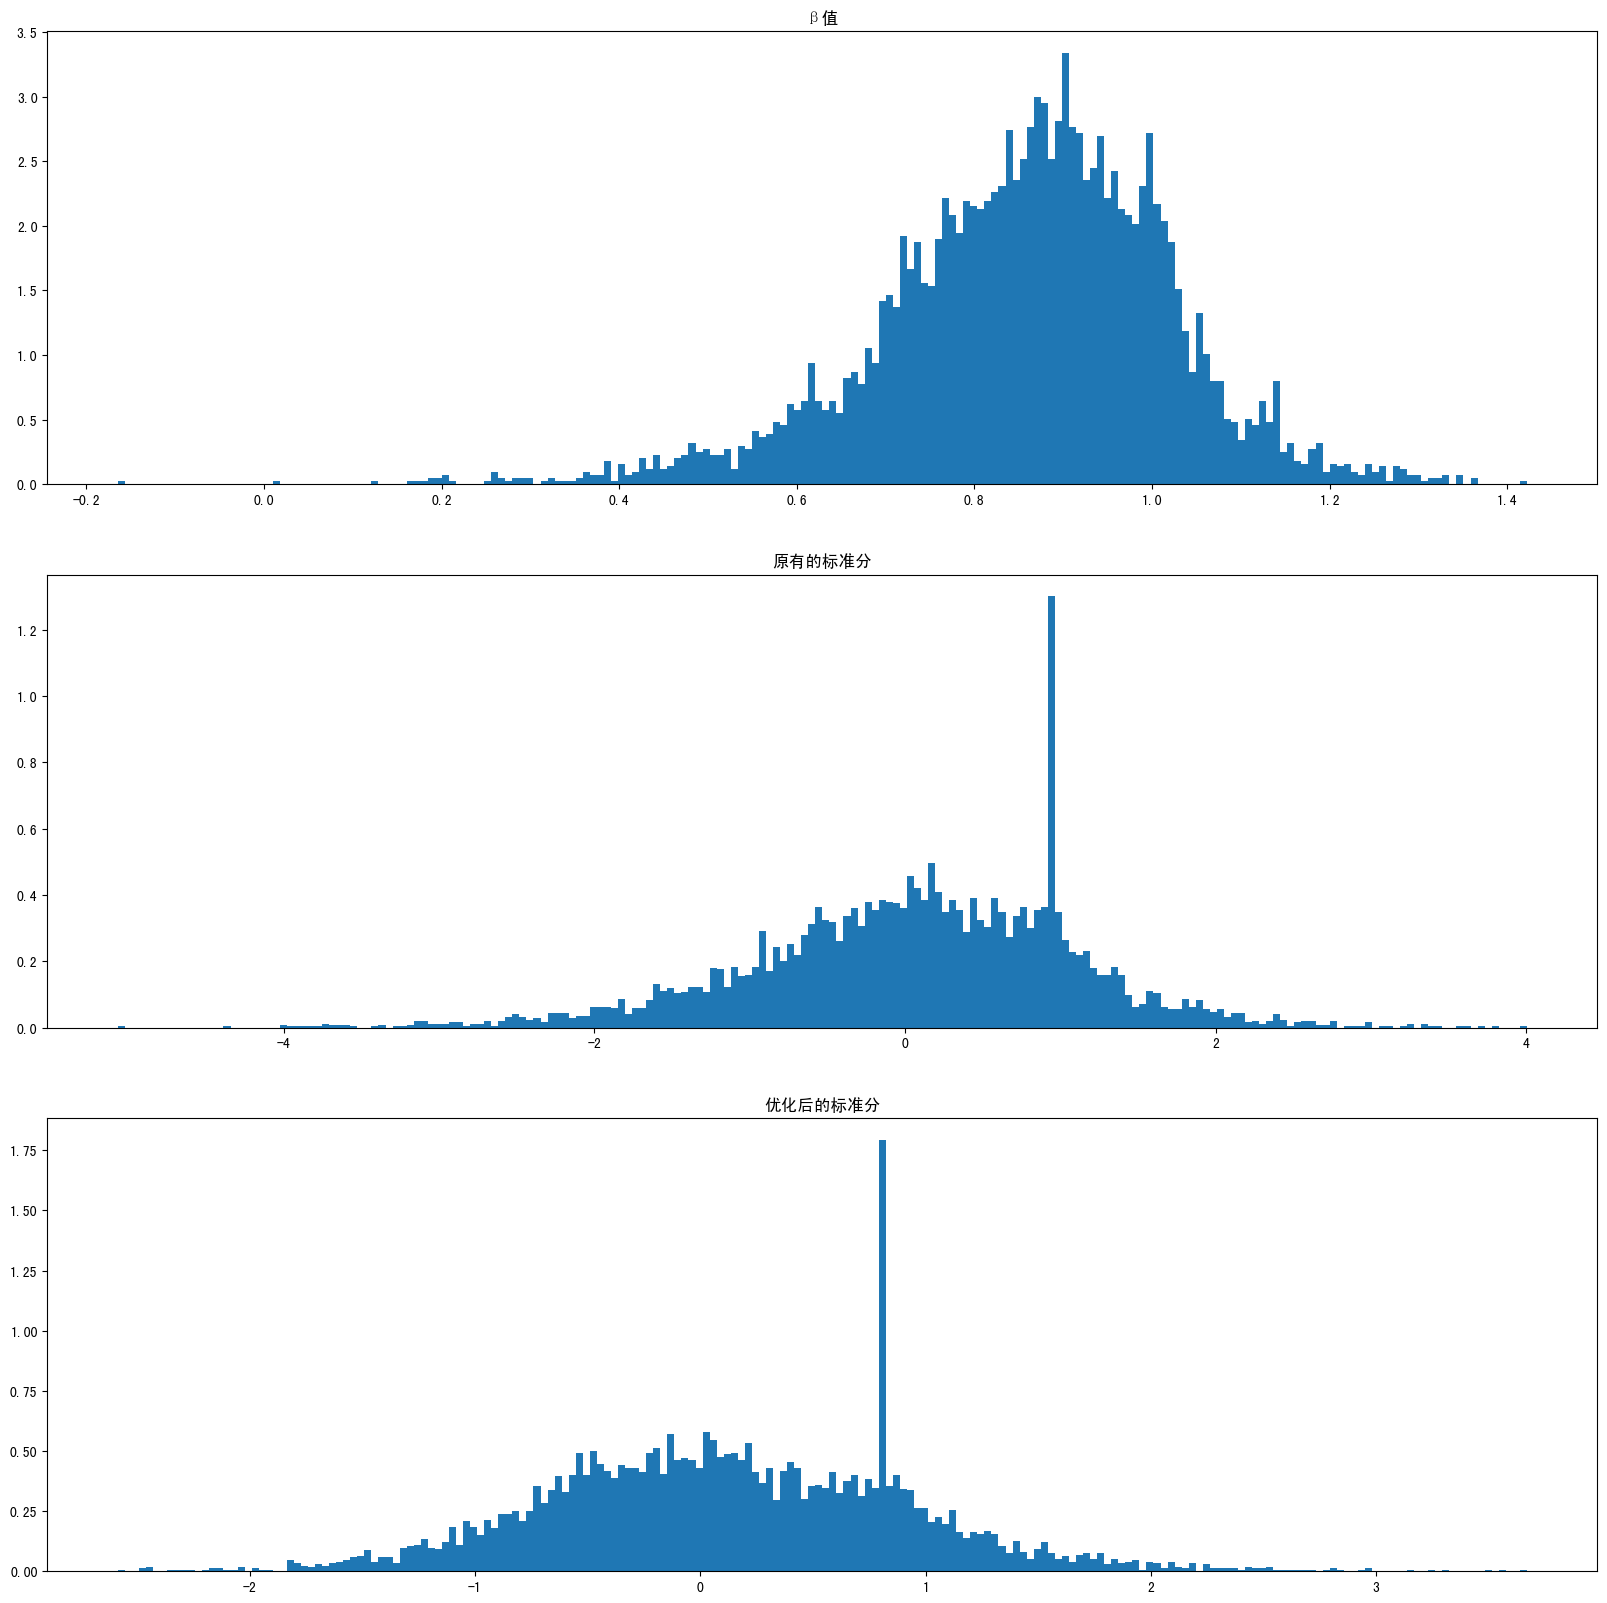

In [109]:
s = df.adjust_zscore
print("原有：",len(s))
print("去NAN：",len(s.dropna()))
s = s.dropna()
print(s.describe())

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 20), dpi=(100))
ax = fig.add_subplot(311)
ax.title.set_text('β值')
_= ax.hist(df.beta,bins=200,density=True)

ax = fig.add_subplot(312)
ax.title.set_text('原有的标准分')
_= ax.hist(df.zscore,bins=200,density=True)

ax = fig.add_subplot(313)
ax.title.set_text('优化后的标准分')
_= ax.hist(df.adjust_zscore,bins=200,density=True)



# 提速calculate_rsrs

calculate_rsrs耗时3秒，太慢了

In [118]:
%%time
code = '002812.SZ'
df = data_loader.load_stock(code)
print("无缓存，加载了数据:", code)

from triples.my import triples_strategy
from utils import utils
from importlib import reload
reload(triples_strategy)
ts = triples_strategy.TripleStrategy(None,utils.load_params('triples/params.yml'))

df = ts.calculate_rsrs(df)
print("计算了其调整后的zscore:",code)

2023-02-04 10:15:07,462 - INFO - data_loader.py:24 P50678: 加载002812数据，函数:stock_zh_a_hist，参数:{'symbol': '002812', 'period': 'daily', 'adjust': 'qfq'}
2023-02-04 10:15:07,467 - DEBUG - data_loader.py:36 P50678: 加载缓存文件:data/002812_002812_daily_qfq.csv
无缓存，加载了数据: 002812.SZ
2023-02-04 10:15:09,513 - DEBUG - triples_strategy.py:163 P50678: 计算了[002812]的[18]天的beta和r2值
2023-02-04 10:15:10,593 - DEBUG - triples_strategy.py:167 P50678: 计算了[002812]的[250]天beta值的移动平均值
计算了其调整后的zscore: 002812.SZ
CPU times: user 3.1 s, sys: 21.2 ms, total: 3.12 s
Wall time: 3.13 s


In [135]:
df = data_loader.load_hsgt_top10()
print(df.columns)
print("top10合计：",len(df))
print("排重后合计：",len(df.code.unique()))
df.name.dtype is np.dtype('object')

2023-02-04 10:40:09,964 - INFO - data_loader.py:24 P50678: 加载hsgt_top10数据，函数:__load_hsgt_top10，参数:{}
2023-02-04 10:40:09,966 - DEBUG - data_loader.py:36 P50678: 加载缓存文件:data/hsgt_top10_.csv
Index(['Unnamed: 0', 'code', 'name', 'close', 'change', 'rank', 'market_type',
       'amount', 'net_amount', 'buy', 'sell'],
      dtype='object')
top10合计： 32930
排重后合计： 493


True